In [1]:
# importing the required modules
# numpy for numerical computations, it is also called as numerical python
# pandas for working with datastrcutures such as dataframe, series and respective provided methods for calculations
# matplotlib for plotting the diagrams

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading the csv file into dataframe

df = pd.read_csv('Data for Q4-5.csv')


In [3]:
#checking first 5 rows
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Q4 Model for predicting the weight

In [4]:
#  segregating the data from weight

x = df.loc[:, df.columns != 'Weight']
x = x.iloc[:, :-1]
x

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [7]:
# lets encode the data for gender, family_history_with_overweight, CAEC, smoke, MTRANS


from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# x['Gender'] = le.fit_transform(x['Gender'])
# x.iloc[:, 3] = le.fit_transform(x.iloc[:, 3])
# x.iloc[:, 4] = le.fit_transform(x.iloc[:, 4])
# x.iloc[:, 7] = le.fit_transform(x.iloc[:, 7])
# x.iloc[:, 8] = le.fit_transform(x.iloc[:, 8])
# x.iloc[:, 10] = le.fit_transform(x.iloc[:, 10])
# x.iloc[:, 13] = le.fit_transform(x.iloc[:, 13])
# x.iloc[:, 14] = le.fit_transform(x.iloc[:, 14])

x.apply(LabelEncoder().fit_transform)


,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,404,295,1,0,170,477,2,0,549,0,0,840,3,3
1,0,404,28,1,0,809,477,2,1,1267,1,1189,0,2,3
2,1,701,1306,1,0,170,477,2,0,549,0,1071,840,1,3
3,1,1021,1306,0,0,809,477,2,0,549,0,1071,0,1,4
4,1,578,1202,0,0,170,0,2,0,549,0,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,397,779,1,1,809,477,2,0,387,0,924,747,2,3
2107,0,572,983,1,1,809,477,2,0,560,0,761,467,2,3
2108,0,617,1006,1,1,809,477,2,0,615,0,788,503,2,3
2109,0,812,923,1,1,809,477,2,0,1181,0,661,458,2,3


In [6]:
y = df.loc[:, df.columns == 'Weight']
y

,Weight
0,64.000000
1,56.000000
2,77.000000
3,87.000000
4,89.800000
...,...
2106,131.408528
2107,133.742943
2108,133.689352
2109,133.346641


# clustering the continuous data

In [7]:
# clustering the datasets into different clusters using k-means

from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init='k-means++', random_state=4)
y_predict = model.fit_predict(x)

In [8]:
x['cluster']  = y_predict
x_d = x.iloc[:,:-1]
y_d = x.iloc[:,-1]

In [20]:
print("clusters predicted", y_d.values)

clusters predicted [0 0 0 ... 0 1 0]


# classification using distance closeness

a) For solving the proablem I have clustered the data into different groups and then used KNN algorithm that classifies the group based upon the distance nearby.


In [9]:
# importing the classifier model and splitting method

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# segregating the datasets

x_train, x_test,y_train,y_test = train_test_split(x_d, y_d, test_size=0.3,random_state=42)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
neigh.score(x_test, y_test)

0.9716088328075709

In [12]:
class_predicted = int(neigh.predict(x_test.iloc[0, :].values.reshape(1,-1)))
print('the class predicted for 0th index test data is', class_predicted)

the class predicted for 0th index test data is 0


# Assumption

B) For this purpose I have made following assumption: 
i> 
There exist linear relationship between the features and target variable Weight

The data is clustered into 3 clusters and cluster is predicted for new data assuming the cluster as a  target variable for input data.

The following plots show the relationship between individual feature and target variable


Text(0, 0.5, 'weight')

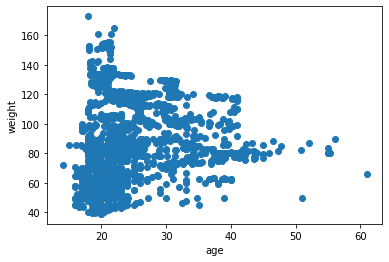

In [13]:
plt.scatter(x['Age'], y)
plt.xlabel("age")
plt.ylabel("weight")

Text(0, 0.5, 'weight')

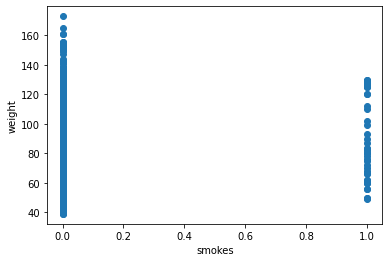

In [14]:
plt.scatter(x['SMOKE'], y)
plt.xlabel("smokes")
plt.ylabel("weight")

II > No intercorelation between the features
This is the important factor in ml. The model will not accurately perform if its features are collinear.

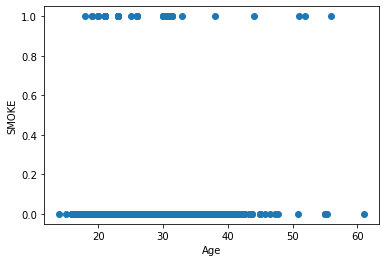

In [15]:
plt.scatter(x['Age'], x['SMOKE'])
plt.xlabel("Age")
plt.ylabel("SMOKE")
plt.show()

In [16]:
import seaborn as sns

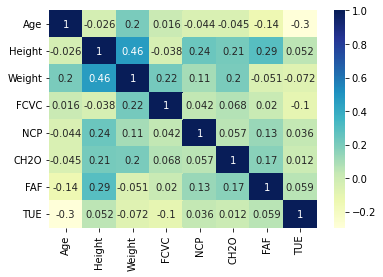

In [17]:
  
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

# why ?

These assumptions are made to check whether our linear model produces the best possible outcome for given data

# Regarding the text variables
For the text variables, I have used label Encoder that encodes each string into numeric value.
for example for gender, if male is denoted by  1 , female is denoted by 2.

This is simple encoding technique. 

We can also encode using 00 and 01 type called as one hot encoding

# Regarding the optimization



First of all we have divided the data into test and train data using train_test_split() method. 

Then  a objective function is used for finding the value to be optimized 

def objective_function():
     y_hat = model.predict(x)
     return mean_Squared_error(y, y_hat)
     
     
Now on the model make small changes to get better solution. This process is followed. 
Due to this optimization technique the model refines its parameters as a result predicts good and promising result. 

# Regarding Overfitting and under fitting

Underfitting :
To prevent underfitting different ml models were trained and find the one which showed promising result.


Overfitting: 
To prevent overfittig the data is shuffled randomly while dividing into train and test set.